In [ ]:
!pip install diffusers transformers accelerate

In [ ]:
from diffusers import StableDiffusionPipeline
import torch
import matplotlib.pyplot as plt
model_id = "dreamlike-art/dreamlike-diffusion-1.0"
model_id2="stabilityai/stable-diffusion-2-1"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
prompt=""" dreamlikerat , a grungy woman with rainbow hair ,travelling between dimensions,dynamic position extreme bokeh,dainty figure,long hair straight down , forn kawaii shirt and baggy jeans"""

In [ ]:
image=pipe(prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

[PROMPT]:  dreamlikerat , a grungy woman with rainbow hair ,travelling between dimensions,dynamic position extreme bokeh,dainty figure,long hair straight down , forn kawaii shirt and baggy jeans


(-0.5, 639.5, 639.5, -0.5)

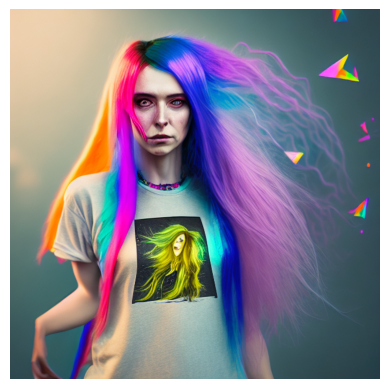

In [ ]:
print("[PROMPT]:",prompt)
plt.imshow(image);
plt.axis('off')

In [ ]:
def generate_image(pipe,prompt,params):
  img=pipe(prompt,**params).images
  num_images=len(img)
  if num_images>1:
    fig,ax=plt.subplots(nrows=1,ncols=num_images)
    for i in range(num_images):
      ax[i].imshow(img[i])
      ax[i].set_axis_off()
    plt.show()
  else:
    fig=plt.figure()
    plt.imshow(img[0])
    plt.axis('off')
  plt.tight_layout()


In [ ]:
prompt="""A girl with blue eyes and curly black hair and cute face ,gril with tiger playing"""
params={}

  0%|          | 0/100 [00:00<?, ?it/s]

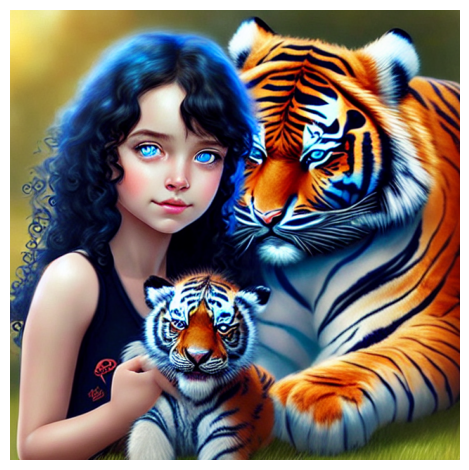

In [ ]:
#num inference steps
params={"num_inference_steps":100}
generate_image(pipe,prompt,params)

In [ ]:
prompt="""A boy with blue eyes and black hair playing with the dog"""


  0%|          | 0/100 [00:00<?, ?it/s]

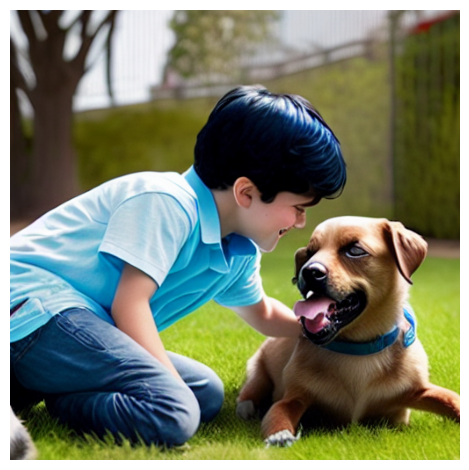

In [ ]:
#height width
params={"num_inference_steps":100,"height":512,"width":512}
generate_image(pipe,prompt,params)

  0%|          | 0/100 [00:00<?, ?it/s]

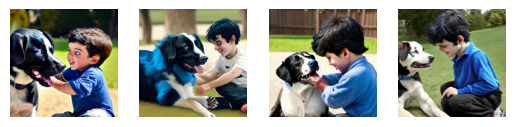

<Figure size 640x480 with 0 Axes>

In [ ]:
#num_images_per_prompt
params={"num_inference_steps":100,"height":512,"width":512,"num_images_per_prompt":4}
generate_image(pipe,prompt,params)

  0%|          | 0/100 [00:00<?, ?it/s]

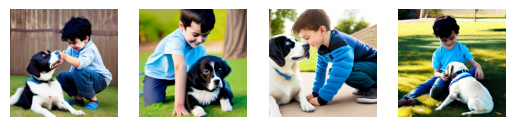

<Figure size 640x480 with 0 Axes>

In [ ]:
#negative_prommpt
params={"num_inference_steps":100,"height":512,"width":512,"num_images_per_prompt":4,"negative_prompt":"ugly"}
generate_image(pipe,prompt,params)